In [1]:
%matplotlib inline

In [4]:
#load the data set
import pandas as pd

df = pd.read_csv(
        filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
        header=None,
        sep=','
)

df.columns=['sepal_len','sepal_wid','petal_len','petal_wid','class']
df.dropna(how='all', inplace=True)#drop empty line

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#split data into x and class lable y
x = df.ix[:,0:4].values
y = df.ix[:,4].values


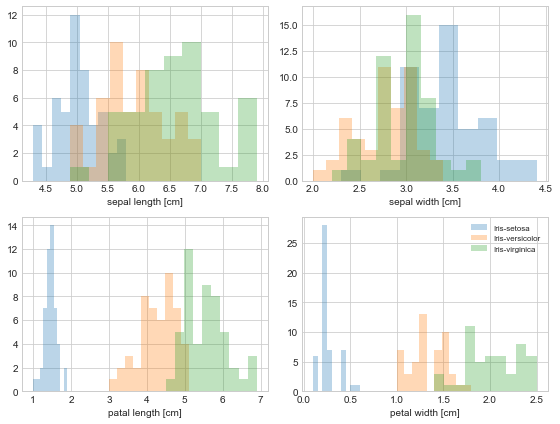

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math

label_dict = {1:'Iris-Setosa',
             2:'Iris-versicolor',
             3:'Iris-Virginica'}

feature_dict = {0:'sepal length [cm]',
               1:'sepal width [cm]',
               2:'patal length [cm]',
               3:'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for cnt in range(4):
        plt.subplot(2,2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(x[y==lab,cnt],
                    label=lab,
                    bins=10,
                    alpha=0.3,)
        plt.xlabel(feature_dict[cnt])

        
    plt.legend(loc= 'upper right',fancybox=True,fontsize=8)
    plt.tight_layout()
    plt.show()
            

In [7]:

from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

In [8]:
mean_vec = np.mean(x_std,axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec))/(x_std.shape[0]-1)
print('Covarience matrix \n%s' %cov_mat)


Covarience matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [9]:
print('numpy covvarience matrix \n%s'%np.cov(x_std.T))

numpy covvarience matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [10]:
cov_mat = np.cov(x_std.T)

#decompose covarience matrix into eign vector and values
eig_vals, eig_vecs = np.linalg.eig(cov_mat)


print('Eignvectors \n%s'%eig_vecs)
print('Eignvalues \n%s'%eig_vals)

Eignvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eignvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [11]:
#correlation matrix
cor_mat = np.corrcoef(x_std.T)

#decompose correlation matrix into eign vector and values
eig_vals, eig_vecs = np.linalg.eig(cor_mat)


print('Eignvectors \n%s'%eig_vecs)
print('Eignvalues \n%s'%eig_vals)

Eignvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eignvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


In [12]:
#eign decomposition of raaw data based on correlatinal matrix
cor_mat2 = np.corrcoef(x.T)

#decompose correlation matrix into eign vector and values
eig_vals, eig_vecs = np.linalg.eig(cor_mat2)


print('Eignvectors \n%s'%eig_vecs)
print('Eignvalues \n%s'%eig_vals)

Eignvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eignvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


In [13]:
#single vector decomposition
u,s,v = np.linalg.svd(x_std.T)
print('vector U\n%s'%u)

vector U
[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


In [14]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("everything is ok! ")

everything is ok! 


In [15]:
#make a list of egin vector

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

#sort the tupple from highst to lowest
eig_pairs.sort(key=lambda x:x[0], reverse=True)

#visually confirm that eign vector are sorted
print('eign vaector in decrising order:')
for i in eig_pairs:
    print(i[0])

eign vaector in decrising order:
2.91081808375
0.921220930707
0.147353278305
0.0206077072356


In [16]:
#explain variance explain how ma eign vect to keep
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

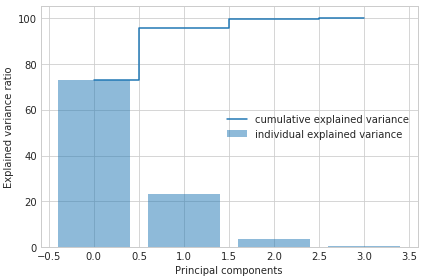

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('pca2.pdf')

In [18]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                     eig_pairs[1][1].reshape(4,1)))

print('Matrix w:\n',matrix_w)

Matrix w:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [19]:
Y = x_std.dot(matrix_w)


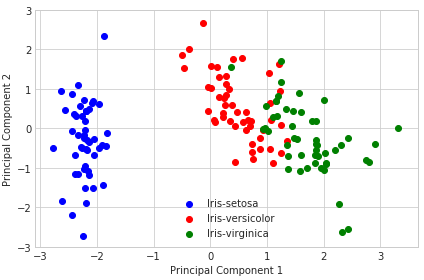

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()

    plt.savefig('pca1.pdf')

In [21]:
#pca with sklearn
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(x_std)

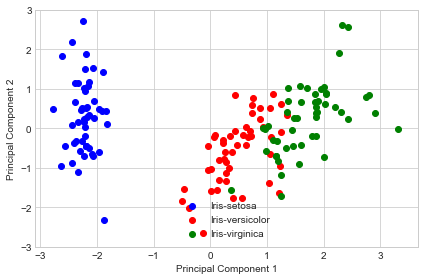

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()
